# 数据归一化
#### 1.最值归一化　　０－１映射　　（ｘ－ｘｍｉｎ）／（ｘｍａｘ－ｘｍｉｎ）　缺点 受outline边界值或没有明显边界时影响较大
#### 2.均值方差归一化  将所有数据归一到均值0方差1的标准正态分本中 (x-xmean)/s

## 随机生成一个矩阵

In [1]:
import numpy as np
np.random.seed(666)
X = np.random.randint(0,201,size=(20,2))
X = np.array(X,dtype=float) #强制类型转换
X

array([[ 130.,  173.],
       [ 158.,   62.],
       [  70.,  158.],
       [ 164.,  189.],
       [  91.,   51.],
       [  60.,  156.],
       [  14.,   63.],
       [ 144.,   46.],
       [  39.,   69.],
       [ 141.,   69.],
       [ 117.,   20.],
       [ 139.,   24.],
       [ 148.,   36.],
       [ 112.,  176.],
       [ 164.,   94.],
       [ 174.,  122.],
       [ 175.,   16.],
       [  77.,  164.],
       [  26.,    5.],
       [  42.,  103.]])

## 1 最值归一化

In [2]:
normalization_1 = np.zeros(shape=X.shape)
normalization_1[:,0] = ((X[:,0] - np.min(X[:,0]))/(np.max(X[:,0])-np.min(X[:,0])))
normalization_1[:,1] = ((X[:,1] - np.min(X[:,1]))/(np.max(X[:,1])-np.min(X[:,1])))

In [3]:
normalization_1

array([[ 0.72049689,  0.91304348],
       [ 0.89440994,  0.30978261],
       [ 0.34782609,  0.83152174],
       [ 0.93167702,  1.        ],
       [ 0.47826087,  0.25      ],
       [ 0.28571429,  0.82065217],
       [ 0.        ,  0.31521739],
       [ 0.80745342,  0.22282609],
       [ 0.1552795 ,  0.34782609],
       [ 0.78881988,  0.34782609],
       [ 0.63975155,  0.08152174],
       [ 0.77639752,  0.10326087],
       [ 0.83229814,  0.16847826],
       [ 0.60869565,  0.92934783],
       [ 0.93167702,  0.48369565],
       [ 0.99378882,  0.63586957],
       [ 1.        ,  0.05978261],
       [ 0.39130435,  0.86413043],
       [ 0.07453416,  0.        ],
       [ 0.17391304,  0.5326087 ]])

In [4]:
import  matplotlib.pyplot as plt

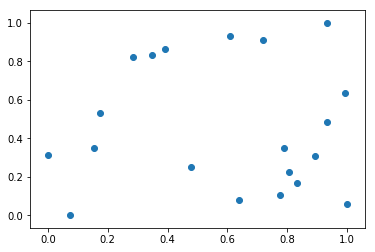

In [5]:
plt.scatter(normalization_1[:,0],normalization_1[:,1])
plt.show()

### sklearn中也有MinMaxScaler

In [36]:
from sklearn.preprocessing import MinMaxScaler
#使用方法同4
#1,创建Scaler 2.fit 这个Scaler 3.通过此Scaler进行transform

## 2 均值方差归一化

In [6]:
normalization_2 = np.zeros(shape=X.shape)
# normalization_2[:,0] = ((X[:,0] - np.mean(X[:,0]))/np.std(X[:,0]))
# normalization_2[:,1] = ((X[:,1] - np.mean(X[:,1]))/np.std(X[:,1]))
std = np.std(X,axis=0)
mean = np.mean(X,axis=0)
normalization_2=(X-mean)/std

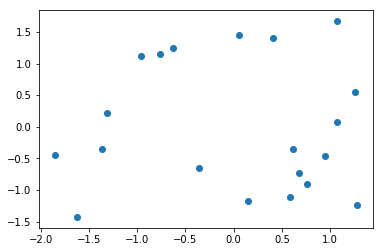

In [7]:
plt.scatter(normalization_2[:,0],normalization_2[:,1])
plt.show()

In [8]:
np.std(normalization_2[:,0])

1.0

In [9]:
np.mean(normalization_2[:,0])

2.2204460492503132e-17

均值接近0 方差接近1

## 3.sklearn中的StandardScaler

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

In [30]:
#分割数据集
X = load_iris().data
y = load_iris().target
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=666)


#### 创建Scaler

In [24]:
sS=StandardScaler()
sS.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [25]:
sS.mean_

array([ 5.81619048,  3.08285714,  3.67047619,  1.15619048])

In [26]:
sS.scale_

array([ 0.80747977,  0.43500567,  1.76046118,  0.75591935])

In [27]:
X_train=sS.transform(X_train)

In [16]:
X_test_standard =sS.transform(X_test)

In [28]:
X_train

array([[-0.63926119,  1.41870072, -1.23290204, -1.26493717],
       [-1.01078752,  0.9589366 , -1.17609875, -0.73578018],
       [-1.75384019, -0.42035577, -1.28970534, -1.26493717],
       [-0.02005063, -0.88011989,  0.13037709,  0.05795529],
       [-0.7631033 ,  0.72905454, -1.28970534, -1.26493717],
       [-1.50615597,  0.72905454, -1.28970534, -1.13264792],
       [ 0.84684415,  0.26929042,  0.81201666,  1.11626925],
       [-0.14389274, -0.42035577,  0.30078698,  0.19024453],
       [ 0.97068626, -0.19047371,  0.41439358,  0.32253378],
       [ 0.2276336 , -0.42035577,  0.47119688,  0.45482302],
       [-1.38231385,  0.26929042, -1.17609875, -1.26493717],
       [-1.13462963,  0.03940835, -1.23290204, -1.39722641],
       [ 1.09452838,  0.03940835,  1.09603315,  1.64542623],
       [ 0.59915993, -0.88011989,  0.69841006,  0.85169076],
       [ 0.35147571, -0.65023783,  0.58480347,  0.05795529],
       [ 0.47531782, -0.65023783,  0.64160677,  0.85169076],
       [-0.14389274,  3.

## 4.自己实现的StandardScaler

In [31]:
from my_preprocessing import my_StandardScaler
X = load_iris().data
y = load_iris().target
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=666)
sS=StandardScaler()

In [32]:
msS = my_StandardScaler()

In [33]:
msS.fit(X_train)

In [35]:
msS.mean_

array([ 5.81619048,  3.08285714,  3.67047619,  1.15619048])

In [34]:
msS.scale_

array([ 0.80747977,  0.43500567,  1.76046118,  0.75591935])

In [20]:
msS.transform(X_train)

array([[-0.63926119,  1.41870072, -1.23290204, -1.26493717],
       [-1.01078752,  0.9589366 , -1.17609875, -0.73578018],
       [-1.75384019, -0.42035577, -1.28970534, -1.26493717],
       [-0.02005063, -0.88011989,  0.13037709,  0.05795529],
       [-0.7631033 ,  0.72905454, -1.28970534, -1.26493717],
       [-1.50615597,  0.72905454, -1.28970534, -1.13264792],
       [ 0.84684415,  0.26929042,  0.81201666,  1.11626925],
       [-0.14389274, -0.42035577,  0.30078698,  0.19024453],
       [ 0.97068626, -0.19047371,  0.41439358,  0.32253378],
       [ 0.2276336 , -0.42035577,  0.47119688,  0.45482302],
       [-1.38231385,  0.26929042, -1.17609875, -1.26493717],
       [-1.13462963,  0.03940835, -1.23290204, -1.39722641],
       [ 1.09452838,  0.03940835,  1.09603315,  1.64542623],
       [ 0.59915993, -0.88011989,  0.69841006,  0.85169076],
       [ 0.35147571, -0.65023783,  0.58480347,  0.05795529],
       [ 0.47531782, -0.65023783,  0.64160677,  0.85169076],
       [-0.14389274,  3.